# Example of supervised classification

In [2]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [4]:
import matplotlib.pyplot as plt

In [5]:
zoo = pd.read_csv('https://island.ricerca.di.unimi.it/~alfio/shared/inforet/zoo.csv', index_col=0)
labels = pd.read_csv('https://island.ricerca.di.unimi.it/~alfio/shared/inforet/class.csv', index_col=0)

In [6]:
zoo.head(5)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
features = [x for x in zoo.columns if x != 'class_type']
X, y = zoo[features], zoo.class_type.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Examples

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier()

In [11]:
dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)

[(0, 'hair'), (1, 'feathers'), (2, 'eggs'), (3, 'milk'), (4, 'airborne'), (5, 'aquatic'), (6, 'predator'), (7, 'toothed'), (8, 'backbone'), (9, 'breathes'), (10, 'venomous'), (11, 'fins'), (12, 'legs'), (13, 'tail'), (14, 'domestic'), (15, 'catsize')]
['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']


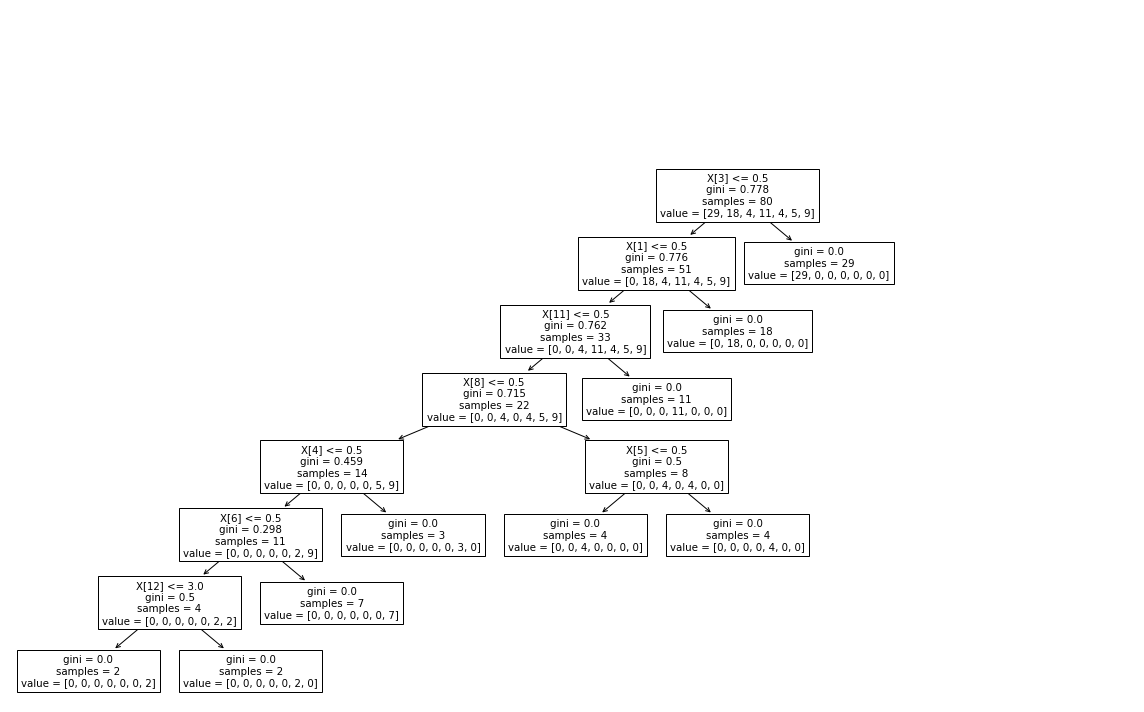

In [15]:
print(list(enumerate(features)))
print(list(labels.Class_Type.values))
fig, ax = plt.subplots(figsize=(16,10))
tree.plot_tree(dt, ax=ax)
plt.tight_layout()
#plt.savefig('/Users/alfio/Teaching/2020-21/inforet/lectures/imgs/dtree.png')
plt.show()

## Confusion matrix

In [24]:
import sklearn.metrics as mtr
import warnings
warnings.filterwarnings('ignore')

In [25]:
cm = mtr.confusion_matrix(y_test, y_hat)

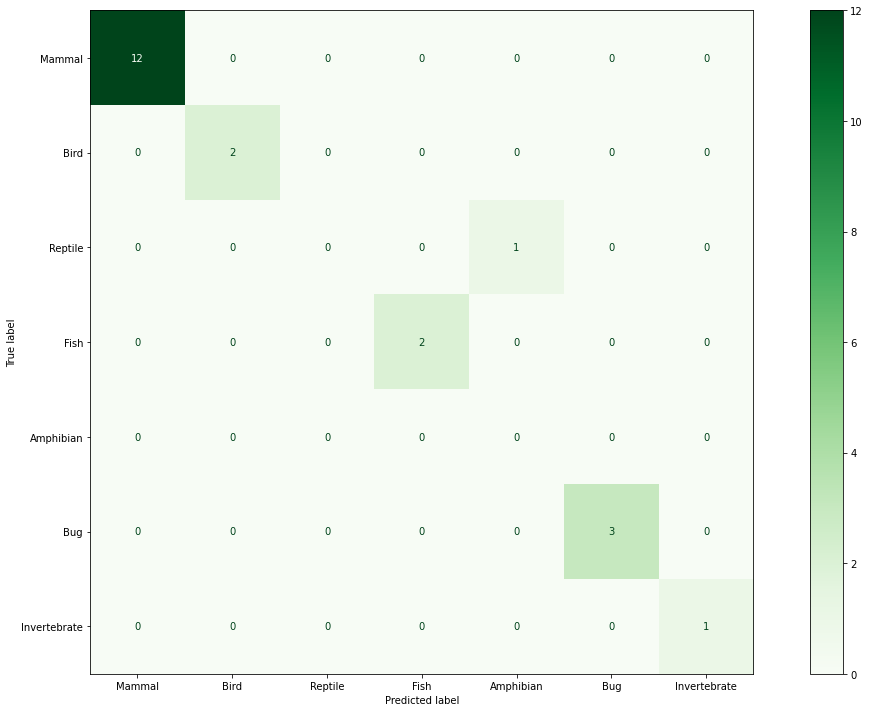

In [27]:
d = mtr.ConfusionMatrixDisplay(cm, labels.Class_Type.values)
fig, ax = plt.subplots(figsize=(16,10))
d.plot(ax=ax, cmap='Greens')
plt.tight_layout()
plt.show()